### Imports and set up

In [1]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'refactorings.json'
show_values = True

In [3]:
with open(file, 'r') as file:
    full_data = json.load(file)

In [4]:
data = {}
for ref in full_data:
    ref_id = ref['id']
    data[ref_id] = []
    for refactorings in ref['refactorings']:
        data[ref_id].append(refactorings['type'])

In [5]:
def add_labels(ax, orient='v', show_values=show_values):
    if show_values:
        if orient == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center")
        else:
            for p in ax.patches:
                _x = p.get_width() + max(ax.patches, key=lambda x: x.get_width()).get_width() * 0.01 
                _y = p.get_y() + p.get_height() / 2
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left", va="center")

### Analysis elements

In [6]:
num_files = len(data)
single_refactoring = sum(1 for v in data.values() if len(v) == 1)
single_type_refactoring = sum(1 for v in data.values() if len(set(v)) == 1)
number_refactorings = sum(len(v) for v in data.values())
number_refactoring_types = len(set(ref for types in data.values() for ref in types))
refactoring_combinations = Counter(tuple(sorted(set(v))) for v in data.values())
distribution_refactorings = Counter(type for types in data.values() for type in types)
distribution_files_ref_count = Counter(len(v) for v in data.values())
distribuion_files_ref_type_count = Counter(len(set(v)) for v in data.values())
distribution_single_refactoring = Counter(v[0] for v in data.values() if len(v) == 1)
distribution_single_type_refactoring = Counter(v[0] for v in data.values() if len(set(v)) == 1)

### Print statments

In [7]:
print("Total number of files:", num_files)
print("Number of files with only one refactoring:", single_refactoring)
print("Number of files with only one type of refactoring:", single_type_refactoring)
print("Total number of refactorings:", number_refactorings)
print("Total number of refactoring types:", number_refactoring_types)
print("Combinations of refactoring types and their counts:", dict(refactoring_combinations))
print("Distribution of refactoring types:", dict(distribution_refactorings))
print("Distribution of files with refactoring counts:", dict(distribution_files_ref_count))
print("Distribution of files with refactoring type counts:", dict(distribuion_files_ref_type_count))
print("Distribution of files with one refactoring:", dict(distribution_single_refactoring))
print("Distribution of files with one type of refactoring:", dict(distribution_single_type_refactoring))

Total number of files: 539
Number of files with only one refactoring: 357
Number of files with only one type of refactoring: 476
Total number of refactorings: 1411
Total number of refactoring types: 12
Combinations of refactoring types and their counts: {('Inline Method',): 36, ('Extract Method',): 281, ('Move Attribute',): 26, ('Move Class',): 64, ('Extract Interface',): 7, ('Rename Package',): 17, ('Pull Up Attribute', 'Pull Up Method'): 5, ('Pull Up Method',): 9, ('Move Method',): 20, ('Extract Superclass',): 11, ('Extract Method', 'Extract Superclass'): 3, ('Pull Up Attribute',): 2, ('Push Down Attribute', 'Push Down Method'): 2, ('Extract Method', 'Move Class', 'Move Method'): 1, ('Push Down Attribute',): 1, ('Extract Method', 'Move Method', 'Push Down Attribute'): 1, ('Move Attribute', 'Pull Up Attribute', 'Pull Up Method'): 1, ('Move Class', 'Move Method'): 1, ('Move Class', 'Rename Package'): 5, ('Move Attribute', 'Move Method'): 6, ('Extract Superclass', 'Move Class'): 3, ('Ex

### Visuals

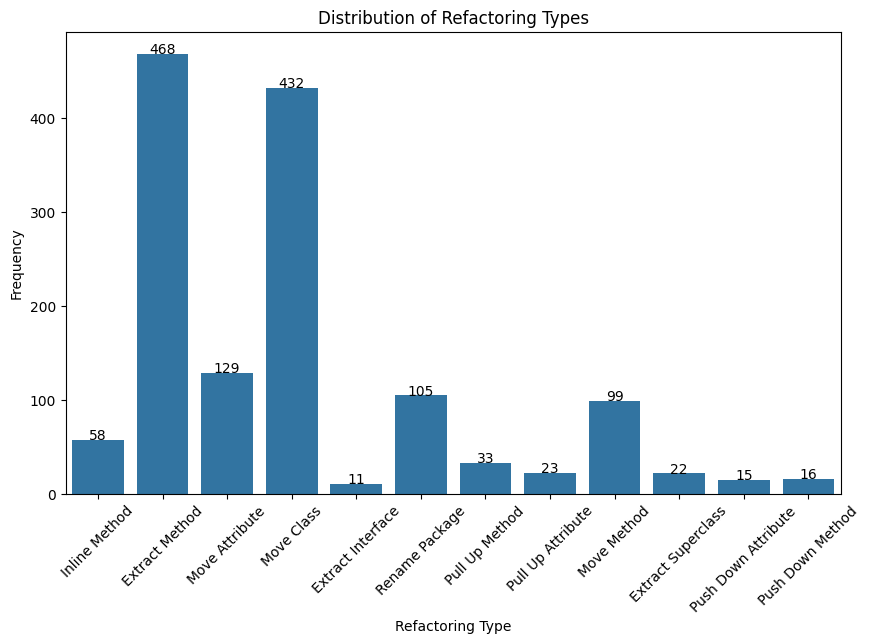

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribution_refactorings.keys()), y=list(distribution_refactorings.values()))
plt.title('Distribution of Refactoring Types')
plt.xlabel('Refactoring Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
add_labels(ax)
plt.show()

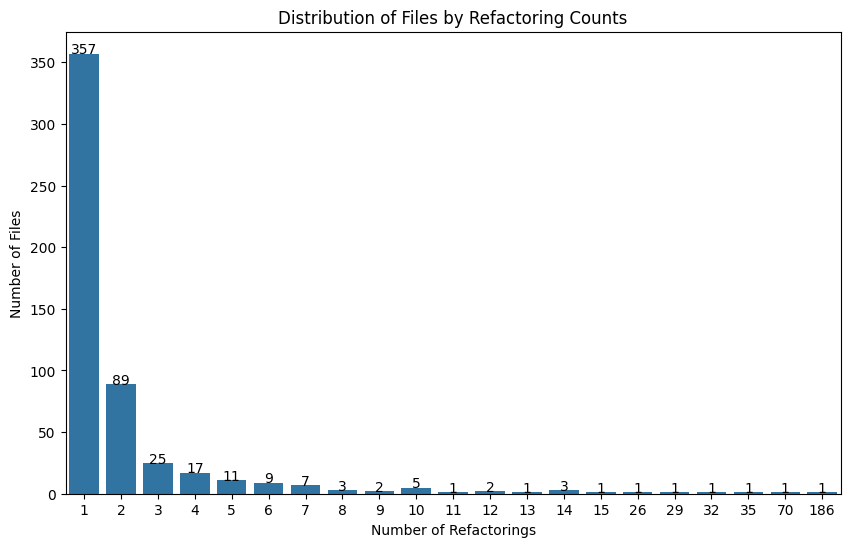

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribution_files_ref_count.keys()), y=list(distribution_files_ref_count.values()))
plt.title('Distribution of Files by Refactoring Counts')
plt.xlabel('Number of Refactorings')
plt.ylabel('Number of Files')
add_labels(ax)
plt.show()

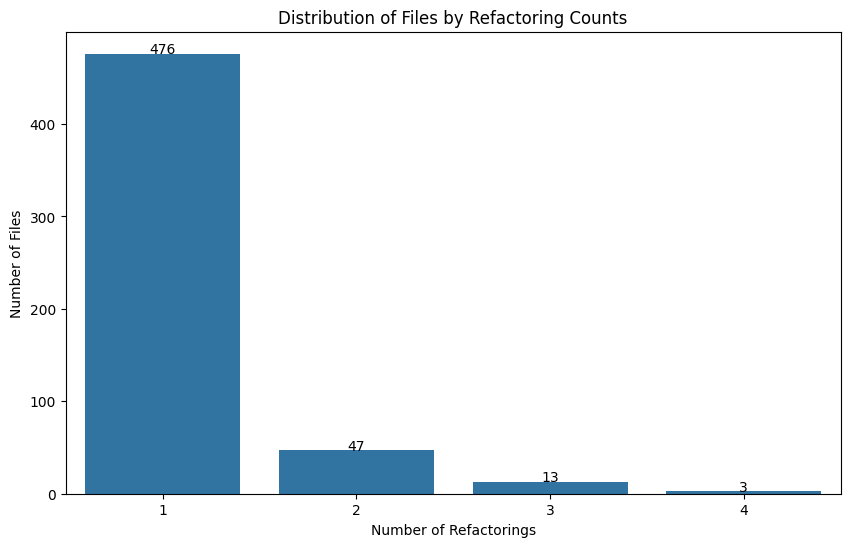

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribuion_files_ref_type_count.keys()), y=list(distribuion_files_ref_type_count.values()))
plt.title('Distribution of Files by Refactoring Counts')
plt.xlabel('Number of Refactorings')
plt.ylabel('Number of Files')
add_labels(ax)
plt.show()

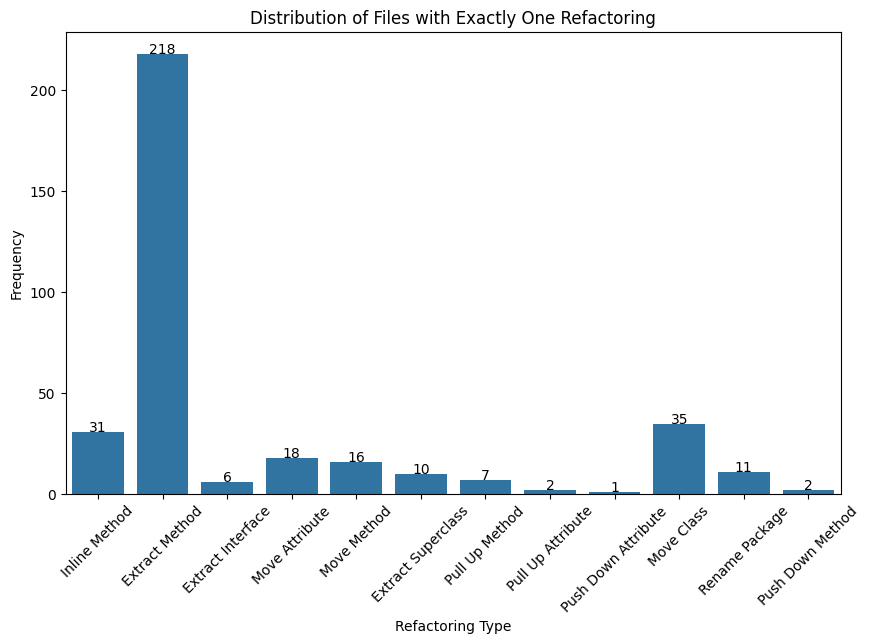

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribution_single_refactoring.keys()), y=list(distribution_single_refactoring.values()))
plt.title('Distribution of Files with Exactly One Refactoring')
plt.xlabel('Refactoring Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
add_labels(ax)
plt.show()

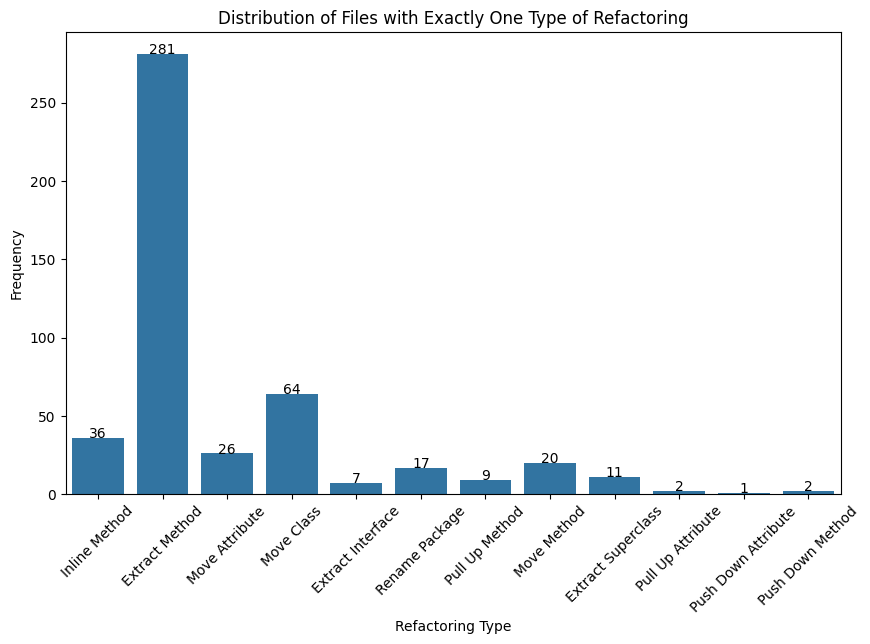

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distribution_single_type_refactoring.keys()), y=list(distribution_single_type_refactoring.values()))
plt.title('Distribution of Files with Exactly One Type of Refactoring')
plt.xlabel('Refactoring Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
add_labels(ax)
plt.show()


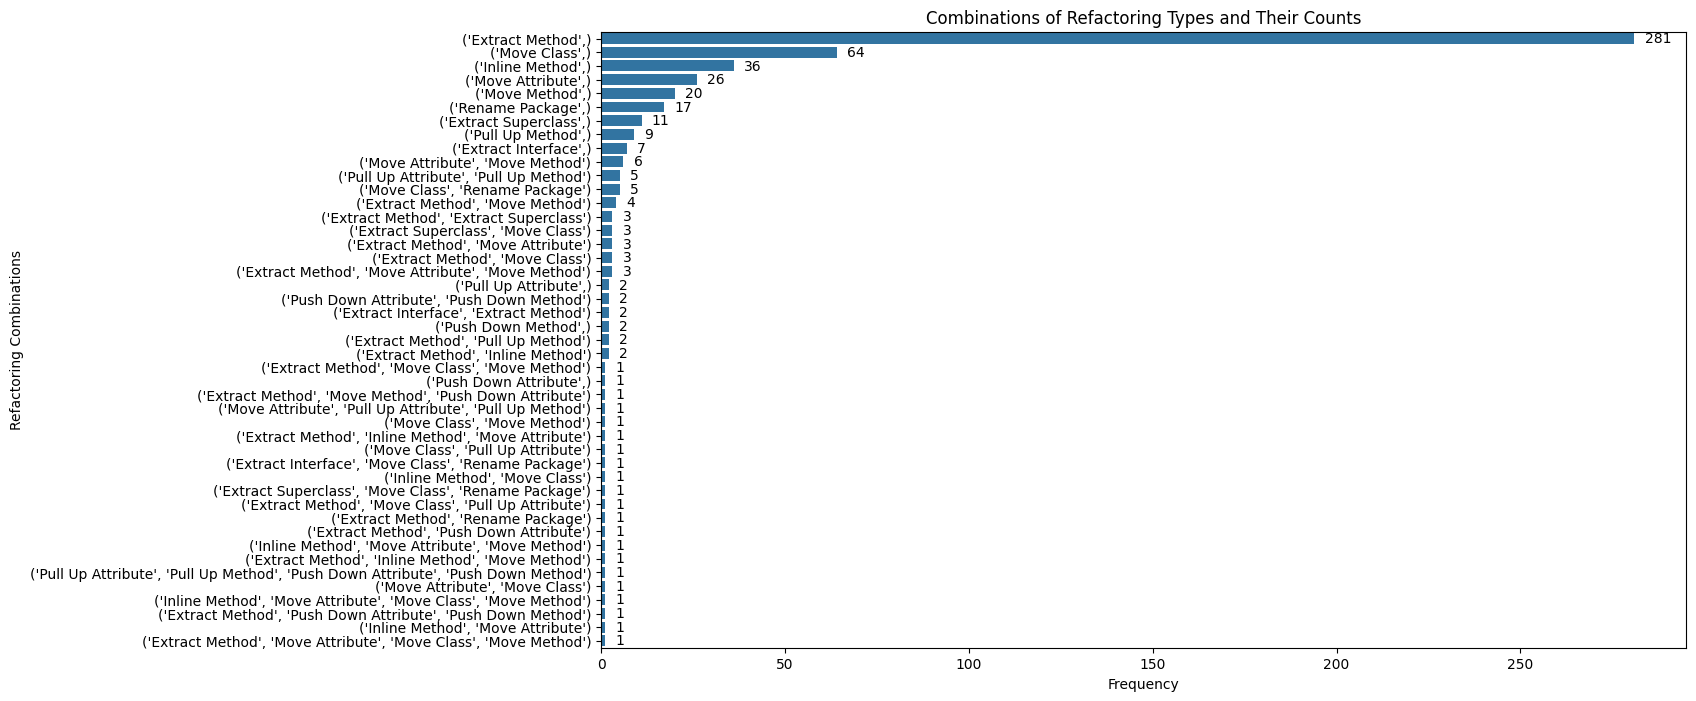

In [13]:
combination_counts = [(str(k), v) for k, v in refactoring_combinations.items()]
combinations, counts = zip(*sorted(combination_counts, key=lambda x: x[1], reverse=True))
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=list(counts), y=list(combinations))
plt.title('Combinations of Refactoring Types and Their Counts')
plt.xlabel('Frequency')
plt.ylabel('Refactoring Combinations')
add_labels(ax, orient='h')
plt.show()

### Manual Anlaysis

*General*
- 539 files, 357 have only 1 refactoring, 476 have only 1 type of refactoring

*Refactoring Type Distribution*
- 'Extract Method' appears 468 times
- 'Extract Interface' and 'Push Down Attribute' appear 11 and 15 times
- 1411 refactorings with 12 types

*Distribution by File Count*
- most files have only 1 type of refactoring (only 63 have more with distribtuion 47, 13, 3 for 2,3,4 types)

*Issues*
- super clear imbalance - extract method the only one with many files
- dataset might have the key just for post-refactoring and not for pre-refactoring as well (I might be mistaken)